In [1]:
import os
import pandas as pd
import numpy as np
from IPython.display import Image #this is used to insert images

imagebasepath = os.path.join(os.getcwd()[:-15], r'Tableau')
datasourcepath = os.path.join(os.getcwd()[:-15], r'FinalDataSource\baseball_data.csv')

# Summary

The data set I used for this project is a set containing 1,157 baseball players (observations). This set has the following variables: <br>

- PlayerName <br>
- Handedness - (R/L/B) right or left or Both handed <br>
- Height(inches) <br>
- Weight(pounds) <br>
- BattingAverage <br>
- HomeRuns (HR) <br>

I imported this set into Tableau as a csv file (text file). Split the fields into the above variables using the ',' as delimeter. Thereafter I converted each variable to the right datatype. <br>

From the analysis I discoverd that most players have a weight that fall within the range of 70 kg - 85 kg, and a height within the range of 1.7 m - 2 m. The left handed players represented about 27% of the total observations within the sample and performed better than any of the other handed players, in terms of home runs and batting averages. <br>

The left handed players had a 6% better median batting average compared to right handed players and a 3% better median batting average compared to both handed players. The left handed players had a 40% better median home run rate compared to right handed players and a 45% better median home run rate compared to both handed players. <br>

The most common handed players was the right handed players which made up about 63% of the total observations and the least common was both handed players that only made up about 10% of the observations. For more details on the analysis process please read on. <br>

To interact with the visuals please visit: <br>

[Tableau round 1](https://public.tableau.com/profile/byronvisualisations#!/vizhome/Vizual_round1/Storyversion1) <br>
[Tableau Final](https://public.tableau.com/profile/byronvisualisations#!/vizhome/Vizual_round2/StoryFinal)

In [2]:
#Use python to load the data source:
df = pd.read_csv(datasourcepath)

The below output shows that there are no missing values within the set

In [3]:
#General information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 6 columns):
name          1157 non-null object
handedness    1157 non-null object
height        1157 non-null int64
weight        1157 non-null int64
avg           1157 non-null float64
HR            1157 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 54.3+ KB


Below is some descriptive statistics about this sample data set.

In [4]:
#Descriptive statistics:
df.describe()

,height,weight,avg,HR
count,1157.000000,1157.000000,1157.000000,1157.000000
mean,72.756266,184.513397,0.186793,45.359551
std,2.142272,15.445995,0.106175,74.065110
min,65.000000,140.000000,0.000000,0.000000
25%,71.000000,175.000000,0.138000,1.000000
50%,73.000000,185.000000,0.238000,15.000000
75%,74.000000,195.000000,0.258000,55.000000
max,80.000000,245.000000,0.328000,563.000000


# Design

First thing I want to do is to convert the measures to the metric system. I want to convert the height variable to meters and the weight variable to kg's. To do this I have to create calculated fields. <br>

- Height(meters) = Height(inches)*0.0254 <br>
- Weight(kg) = Weight(pounds)*0.453592 <br>

Now that I have the data imported, the datatypes converted and new variables derived I'm ready to start building out visuals.
In the next sections I'll explain my steps and thought process.

> ## (1) Single Variate plots

> To understand the distribution of the continuous explanatory variables as well as to get a feel for the representation of observations within the data set I made use of two plot types - Bar charts and Histograms. <br>

> My reason for choosing the Bar charts is because we are looking at a discrete categorical variable along with a continues measure. The color coding is to highlight out each category.

I used the bar chart to plot the percentage representation (of total) for each of the three categorical variable values (left handed, right handed, both handed).

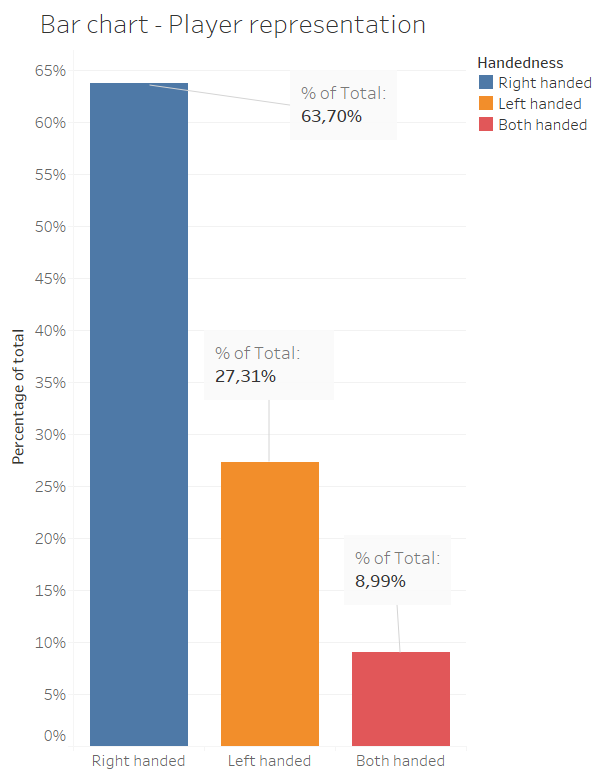

In [5]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Bar chart - Player representation.png')
Image(filename)

From the above image it can be seen that right handed players make up 63.70% of the total players within the data set, while both handed players make up the minority at only 8.99% of the total. This could create one of two interpretations. Either the data set is not represented well and more data has to be collected, or it is just more common to have players that are right handed. What I would do is scrape the web for more baseball players and add these observations to the current dataset to enrich it with more players, based on this new dataset I will look at the representation per handedness (this analysis is not included as part of this report).

The next plot I looked at was the histogram for the players' weight across the handed categories. <br>
The reason for choosing the Histogram for the next plots is because we are looking at the distribution of a continuous variable. The choice for having the handedness categorised is because its a discrete variable that will allow for the users to filter and see how the distribution changes for each category.

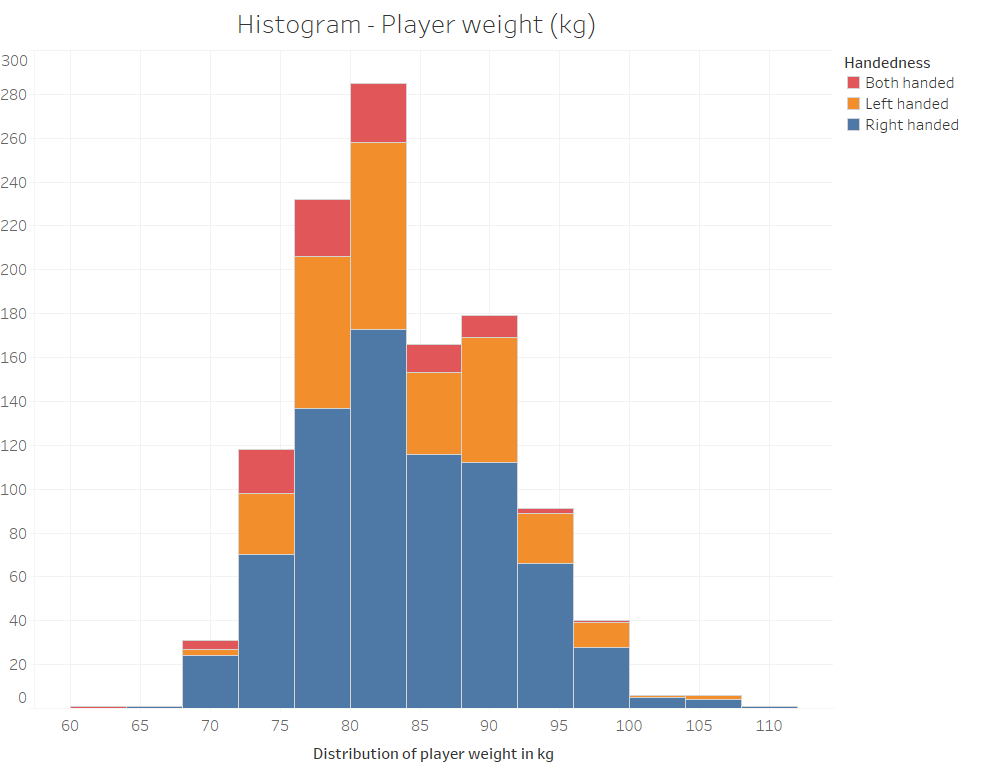

In [6]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Histogram - Weight.png')
Image(filename)

In [7]:
weightarray = df['weight']*0.453592

In [8]:
np.mean(weightarray)

83.69380064304237

In [9]:
np.median(weightarray)

83.91452

From the above it can be noted that the weight of the players is normally distributed, since the median and mean are extremely close - there is symmetry. The mode or most common weight falls between 80 kg and 85 kg.

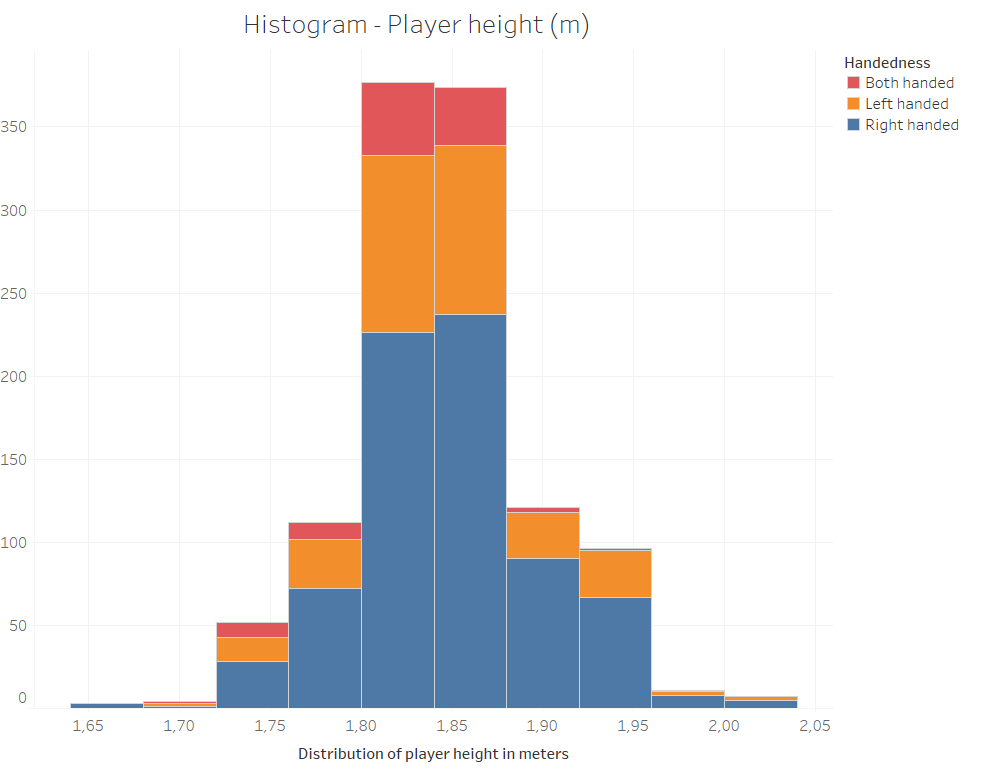

In [10]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Histogram - Height.png')
Image(filename)

In [11]:
heightarray = df['height']*0.0254

In [12]:
np.mean(heightarray)

1.848009161624892

In [13]:
np.median(heightarray)

1.8541999999999998

From the above it can be noted that the height of the players is normally distributed, since the median and mean are extremely close - there is symmetry. The mode or most common height falls between 1.80 m and 1.88 m.

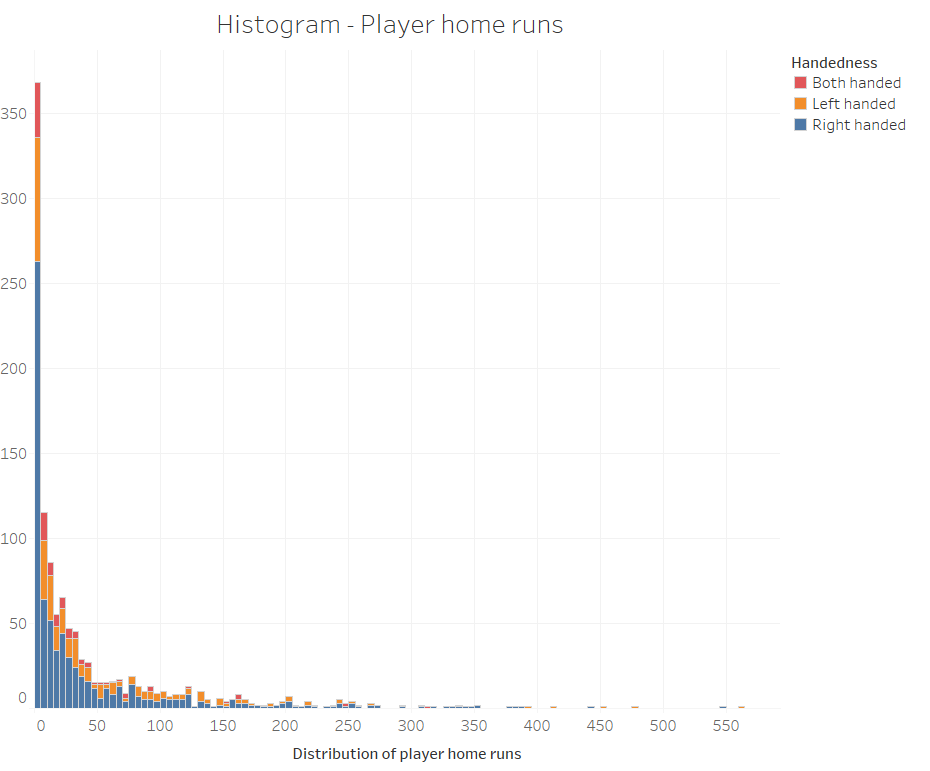

In [14]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Histogram - HomeRuns.png')
Image(filename)

This histogram is a long tailed visual indicating that the majority of the players scored very few home runs. There are some observations out to the far right. These far out data points could be outliers or are points that have merely been captured incorrectly. The best way to go about building an understanding for these far out points is to scrape the web in order to obtain further information on home runs for these players and based on this evidence either remove or keep the observations (this analysis will not be considered as part of this report).

> ## (2) Bi Variate plots

> In this section I look at the relationship between some of the variables within the data set. For this analysis I used scatter plots and box plots <br>

> In this section I made use of the scatter plot type, my reason for selecting this is because I want to show the relationship between quantitative variables. This will allow to find any patterns thats hidden within the data. <br>

> The color choice was to create a visual that seperates and identifies outliers from valid observations

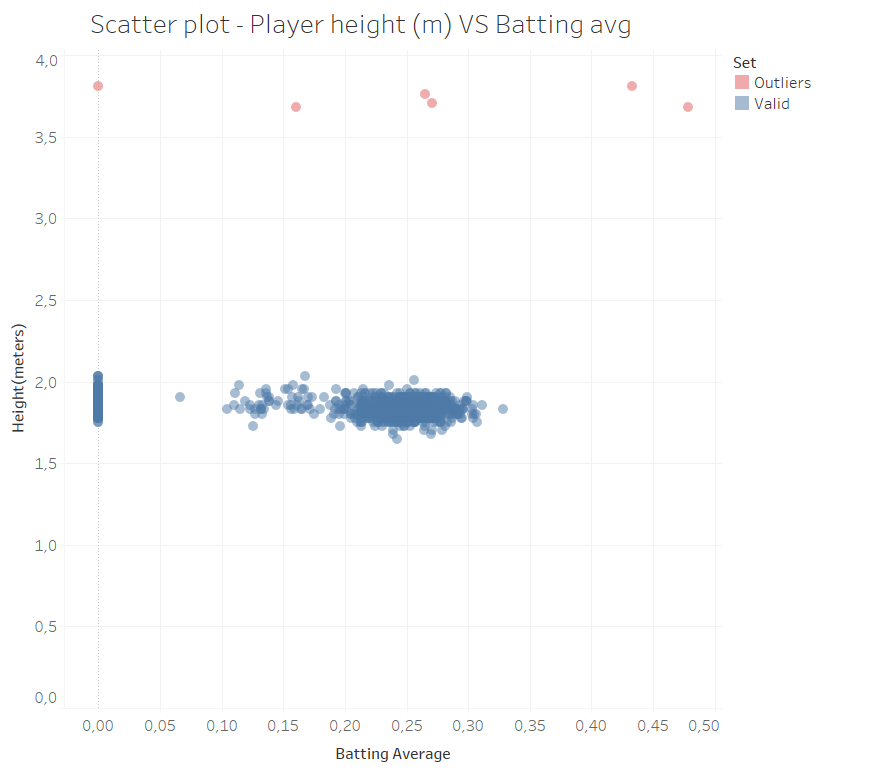

In [15]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Scatter - heightVSbatting.png')
Image(filename)

The scatter plot above shows the batting average of the players against their height. There is a slight negative correlation within this view (this indicates that the batting average is slightly better for players on a lower height band). The observations gather around a height of between 1.7 m - 2 m, with an average performance between 0.2 - 0.3. Within this visual I created a set with two members (outliers, valid). The red outliers I flagged since the height of more than 3.5 m did not make sense.

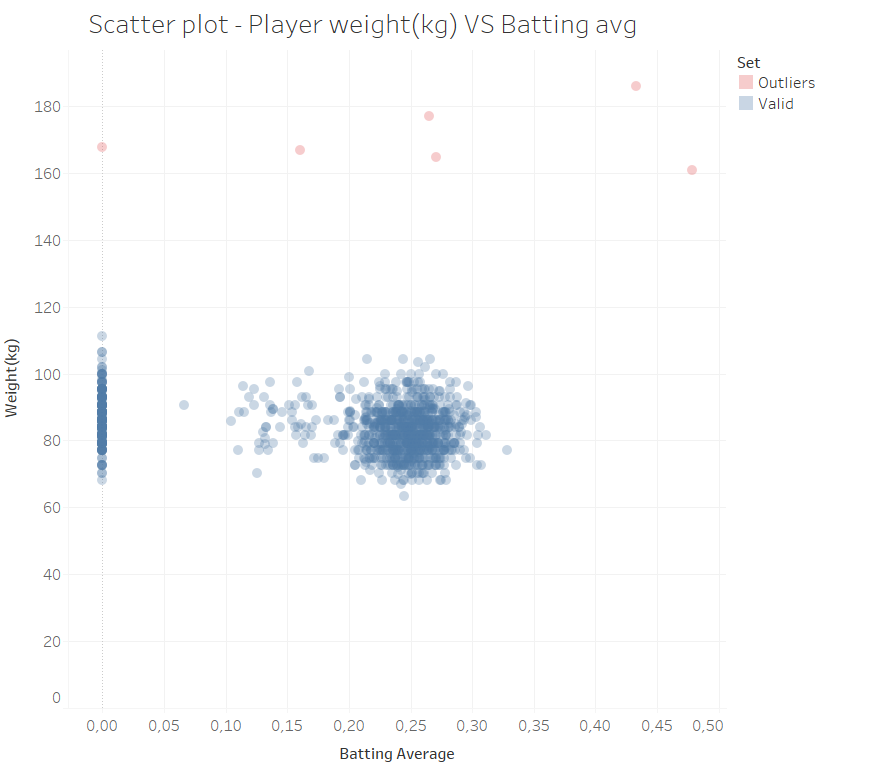

In [16]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Scatter - weightVSbatting.png')
Image(filename)

This scatter plot shows the batting average for the players against their weight. Again as with the previous visual I highlight the outliers in red. Within this figure I notice a cluster that is a bit more spread out with the most common weights falling between 70 kg - 85 kg and batting average between 0.2 - 0.3. I could not see any obvious correlation between the weight and batting average. <br>

My reason for choosing the box plots with the next visuals was to draw a clear comparison between the categorical handedness variable along with a quantitative measure. I color encoded the outliers and valid observations to indicate to the reader where those outlier values reside.

I used the median statistic per categorical group as a reference line to show the difference in hight.

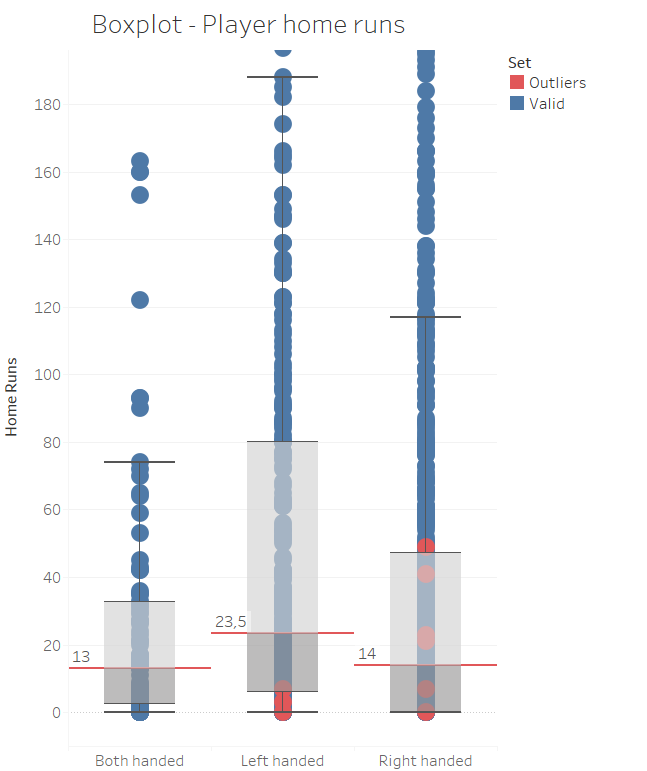

In [17]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Boxplot - HomeRuns.png')
Image(filename)

The box plot shows the distribution range of home runs over the handed categorical variable. For the left handed category the median (23.5) home runs is higher than the other two categories. Even though right handed players make up the biggest portion of the observations the left handed players seem to outperform the other handed players. <br>

I wanted to understand if the red outlier observations had a significant impact on the descriptive statistics. I found that the exclusion of the outliers had a mimimal effect and it still holds true that based on this sample set, left handed players have more home runs <br>


An interesting analysis would be to understand how the salaries (earnings) across these three categories would differ. I suspect that both handed players would earn a higher salary. <br>

The reason why I say this is because the median statistics (batting average, home runs) for both handed players is similar to that of right handed players. Keep in mind that both handed players only making up about 9% of the dataset, while right handed players make up almost 64%. The relevance of this is that statistics taken over more observations (right handed) compared to statistics taken over less observations (left handed) could cause a skewed outcome. <br>

Given that the descriptive statistics (median) of the right handed and both handed players are quit closely aligned, dispite the signicant difference in the number of observations. If these number of observations were more closely aligned the results might reflect a higher performance for both handed players and potentially a higher earning. <br>


From the dataset provided there is not sufficient information to completely support my statement. In order to gain more insight I would collect more data for left and both handed players aswell as salary information for all three groups over a period of time. Once this data is obtained I would setup my hypothesis, and use inferential statistics to make inferences (this will not be looked at as part of this report).

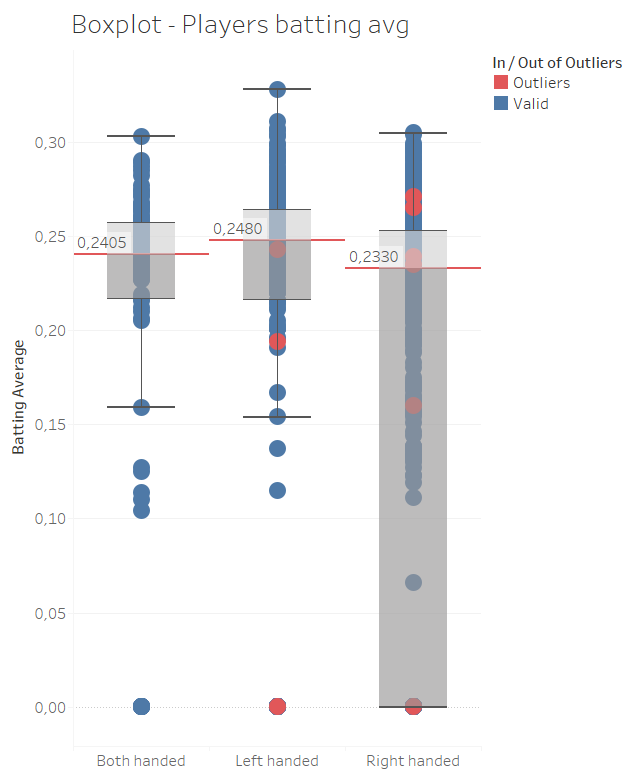

In [18]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Boxplot - Batting Average.png')
Image(filename)

The box plot shows the distribution range of the batting average over the handed categorical variable. For the left handed category the median (0.2480) is higher than the other two categories. Even though right handed players make up the biggest portion of the observations, the left handed players seem to outperform the other handed players. <br>


To understand again if the red outlier observations had a significant impact on the descriptive statistics, they were excluded. I found that the exclusions again had a mimimal effect and it still holds true that based on this sample set, left handed players have a better batting average <br>

To understand how much better the left handed players has performed in terms of the median metric on home runs and batting average I looked at a table calculation to show the percentage difference in this metric compared to left handed players. The images below shows this comparison.

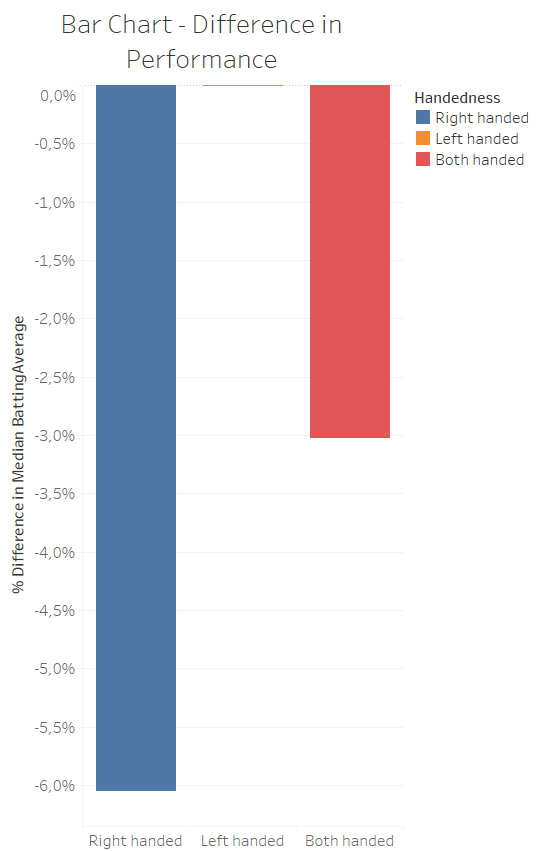

In [19]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Bar chart - PercentageDiff(1).png')
Image(filename)

The image above shows that left handed players had a 6% better median batting average compared to right handed players and a 3% better median batting average compared to both handed players.

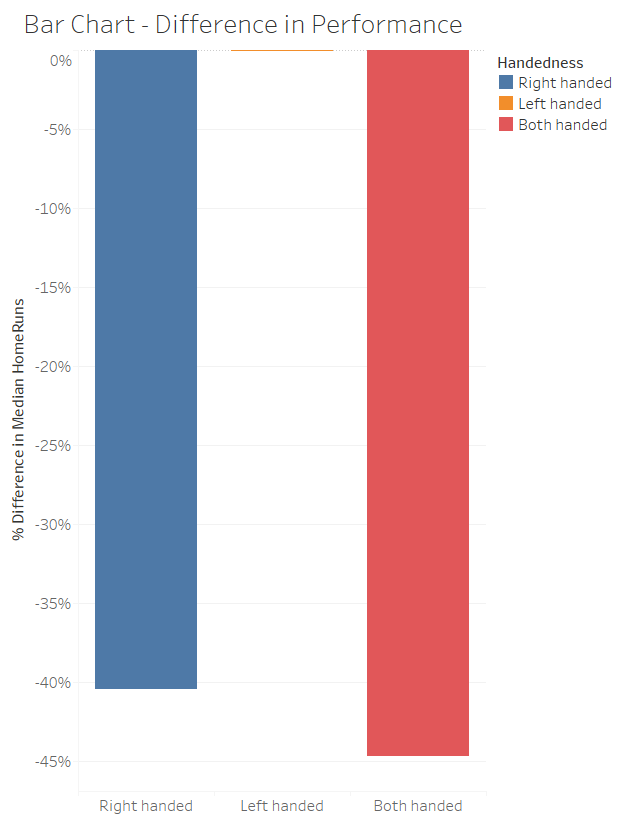

In [20]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Bar chart - PercentageDiff(2).png')
Image(filename)

The image above shows that left handed players had a 40% better median home run rate compared to right handed players and a 44% better median home run rate compared to both handed players.

> ## (3) Multi Variate plots

> For this part of the analysis I look at multiple variables together aswell as trying to understand general trends within the data set.

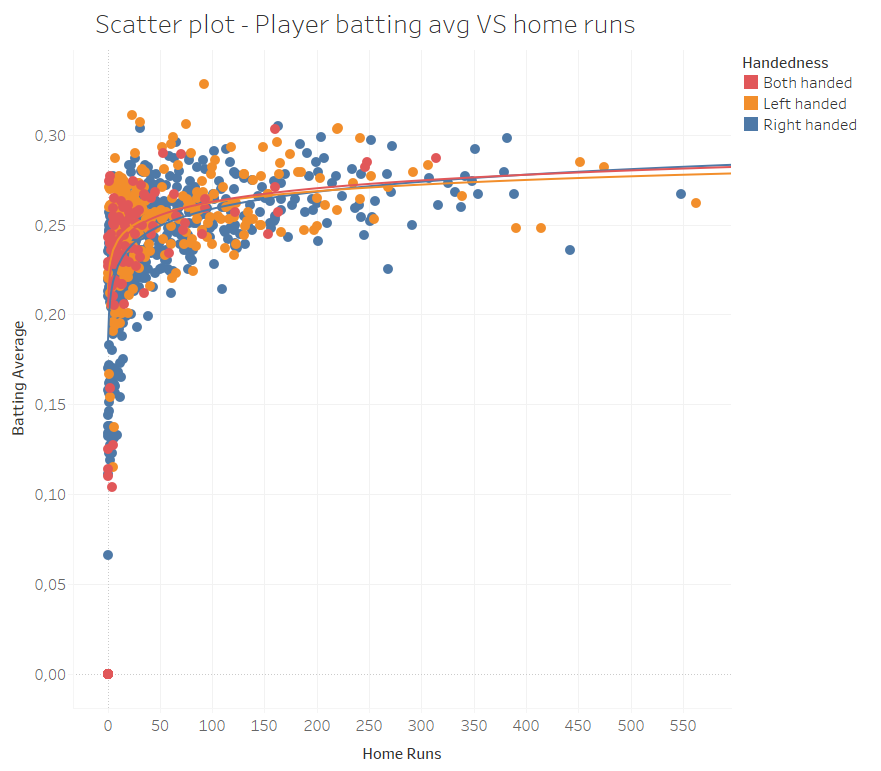

In [21]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Scatter - battingVShomeruns.png')
Image(filename)

The above scatter plot shows player home runs against batting averages for each of the three categories of handedness. I've also included a logarithmic trend line to the observations. From this trend line it can be seen that left handed players lie mostly above the other handed players up to 250 home runs, thereafter a switch happens and the right handed players batting average is better. The players that are both handed seem to be in the middel of the two alternatives

Below is some information from the trend line model implemented in Tableau 

Trend Lines Model <br>
A linear trend model is computed for sum of BattingAverage given natural log of sum of HomeRuns.  The model may be significant at p <= 0,05.  The factor Handedness may be significant at p <= 0.05. <br>

Model formula: <br>
Handedness*( ln(HomeRuns) + intercept ) <br>
SSE (sum squared error): <br>
0,546753 <br>
MSE (mean squared error): <br>
0,0006321 <br>
R-Squared: <br>
0,333332 <br>
Standard error: <br>
0,0251413 <br>
p-value (significance): <br>
< 0,0001

From the R-squared value 33% of the change in the one variable can be explained by the change in the other

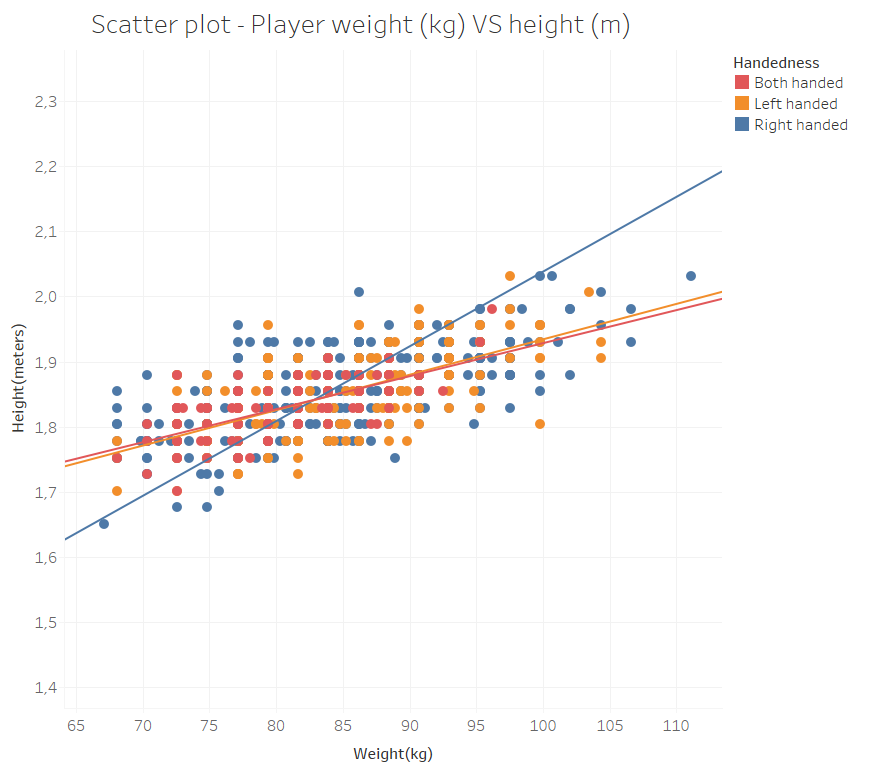

In [22]:
#This is the code used to display the below image:
filename = os.path.join(imagebasepath, 'Scatter - weightVSheight.png')
Image(filename)

The scatter plot above shows the linear relationship between a players height and weight.

Below is some information from the trend line model implemented in Tableau 

Trend Lines Model <br>
A linear trend model is computed for sum of Height(meters) given sum of Weight(kg).  The model may be significant at p <= 0,05.  The factor Handedness may be significant at p <= 0.05. <br>

Model formula: <br>
Handedness*( Weight(kg) + intercept ) <br>
SSE (sum squared error): <br>
5,74617 <br>
MSE (mean squared error): <br>
0,0050054 <br>
R-Squared: <br>
0,596797 <br>
Standard error: <br>
0,0707487

From the R-squared value 60% of the change in the one variable can be explained by the other

# Feedback

Please let me know what you thought of the analysis and visuals. I will use this information to improve upon my work.

> ### How can I improve my analysis?

> More depth of descriptions (describe the visuals better) <br>
> Improve axis description <br>
> Decribe (give more details) on how you would enrich the data to better support your statements <br>
> By how much is one group better than the other (%)

I reviewed the first point and added more details to describe my thought process better.<br>
For the second point I noted that one of my visuals had a label that created confusion. <br>
I fixed this visual and renamed the axis to "percentage of total" for the first bar chart in the report. <br>
The 3rd point I released that I made statements of how one could improve on this analysis, but I never gave more details around my thought process of how one would go about doing it. In order to fix this I described in more detail how I would collect more data and how I would test for drawing inferences. <br>
On the final point there was no indication of how much better one handed group was vs another. In order to fix this I created two additional bar charts with a table calculation that gets the percentage difference of handed groups compared to the left handed group. I added these plots to the report and describe what the represent.


# Resources

[Help Online](https://www.tableau.com/support/help)